## To predict the best model that can predict accurate whether a customer is likely to churn or not 

In [1]:
# import important libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# load the data

data=pd.read_excel("datasets/customer_churn_large_dataset.xlsx")

In [3]:
# check first 10 records

data.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0
5,6.0,Customer_6,67.0,Male,New York,15.0,82.65,456.0,1.0
6,7.0,Customer_7,30.0,Female,Chicago,3.0,73.79,269.0,0.0
7,8.0,Customer_8,67.0,Female,Miami,1.0,97.70,396.0,1.0
8,9.0,Customer_9,20.0,Female,Miami,10.0,42.45,150.0,1.0
9,10.0,Customer_10,53.0,Female,Los Angeles,12.0,64.49,383.0,1.0


In [4]:
# size of the data

data.shape

(100000, 9)

In the dataset we have 10000 rows and 9 columns 

In [5]:
# feature information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.9+ MB


In [6]:
# describe the data

data.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
10%,10000.900000,23.000000,3.000000,37.070000,94.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
90%,90000.100000,65.000000,22.000000,93.080000,456.000000,1.000000
95%,95000.050000,68.000000,23.000000,96.510000,478.000000,1.000000


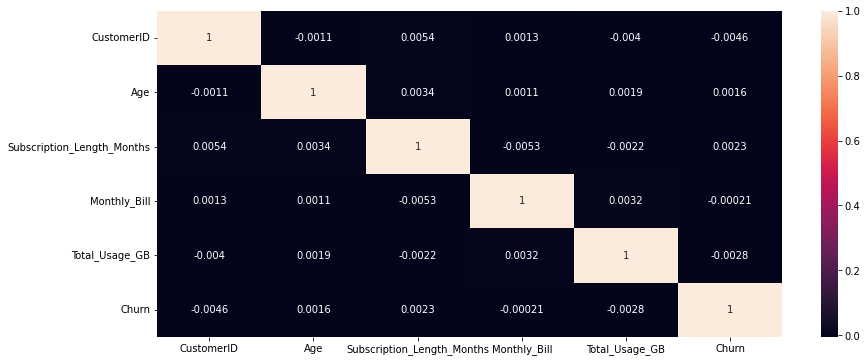

In [7]:
# Check Correlation between all features using heat map

plt.figure(figsize=(14,6))
sns.heatmap(data.corr(), annot =True)
plt.show()

## data preprocessing

### check missing values

In [8]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

##### there is no any null value

### Check Duplicate values

In [9]:
# duplicate observations analysis

data.duplicated().sum()

0

##### there is no any duplicate value

### drop CustomerID column

In [10]:
data.drop('CustomerID',axis=1,inplace=True)

## check Outliers

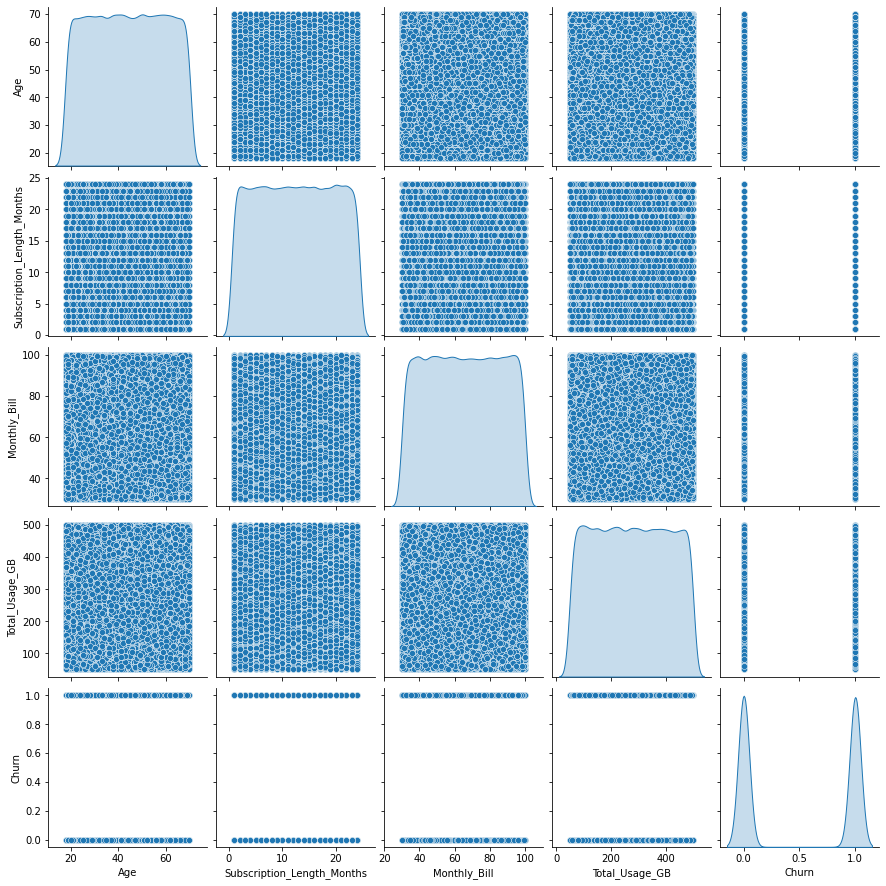

In [11]:
# check the outliers by visualization

sns.pairplot(data=data, diag_kind='kde')

C:\Users\giru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Total_Usage_GB'>

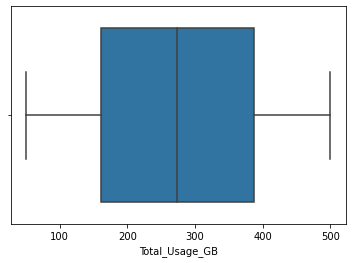

In [12]:
sns.boxplot(data.Total_Usage_GB)

C:\Users\giru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Monthly_Bill'>

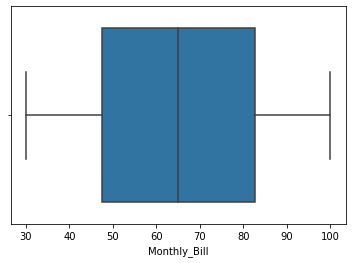

In [13]:
sns.boxplot(data.Monthly_Bill)

C:\Users\giru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Subscription_Length_Months'>

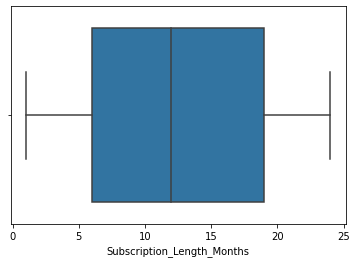

In [14]:
sns.boxplot(data.Subscription_Length_Months)

C:\Users\giru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age'>

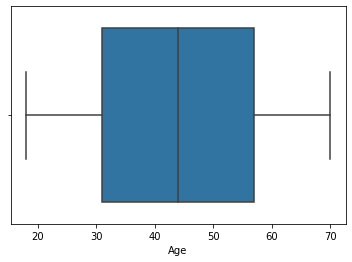

In [15]:
sns.boxplot(data.Age)

In [16]:
## categorical Variables
categorical_variables = [col for col in data.columns if col in "O"
                        or data[col].nunique() <=10
                        and col not in "Churn"]

categorical_variables

['Gender', 'Location']

In [17]:
# Numeric Variables

numeric_variables = [col for col in data.columns if data[col].dtype != "object"
                        and data[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

In [18]:
# To determine the threshold value for outliers

def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [19]:
# Are there any outliers in the variables

def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

## there is no any Outlier 

# Data Visualization 

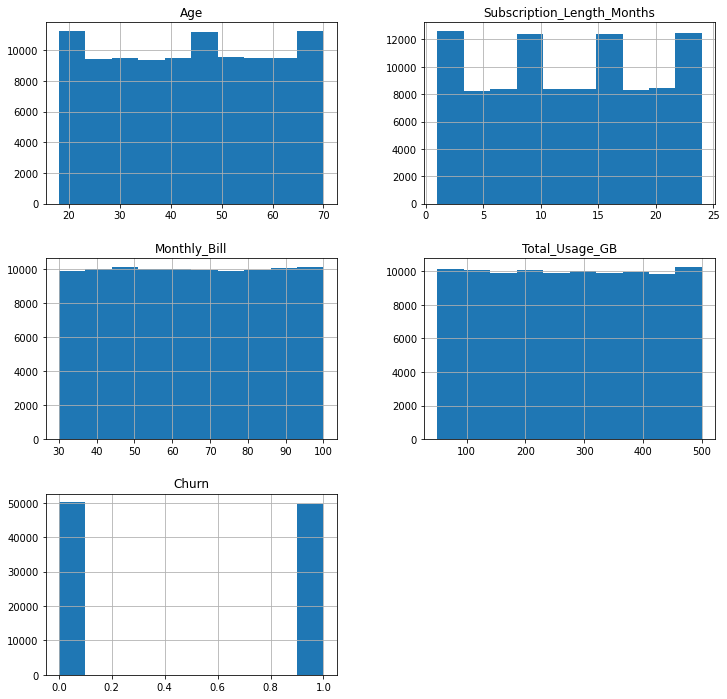

In [20]:
data.hist(bins=10,figsize=(12,12))    
plt.show()

In [21]:
data['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

<AxesSubplot: >

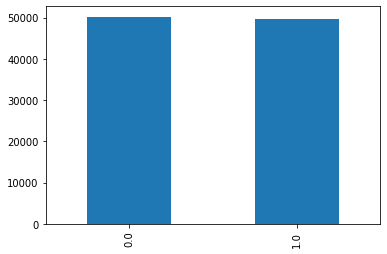

In [22]:
data['Churn'].value_counts().plot.bar()

In [23]:
data['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

<AxesSubplot: >

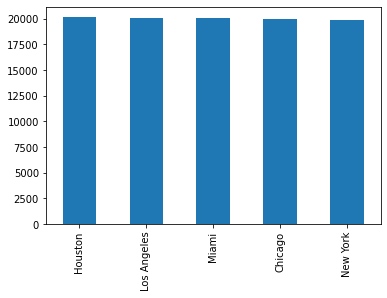

In [24]:
data['Location'].value_counts().plot.bar()

<AxesSubplot: >

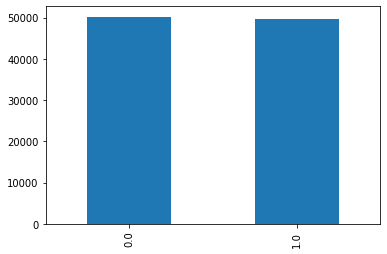

In [25]:
data['Churn'].value_counts().plot.bar()

In [26]:
data['Churn'].value_counts()

0.0    50221
1.0    49779
Name: Churn, dtype: int64

## find churn and not churn according to columns 

In [27]:
# Customers leaving the company

churn = data.loc[data["Churn"]==1]


In [28]:
# Customers leaving the bank
not_churn = data.loc[data["Churn"]==0]


##### Gender

In [29]:
# Frequency of not_churn group according to Gender
not_churn["Gender"].value_counts().sort_values()

Male      24949
Female    25272
Name: Gender, dtype: int64

In [30]:
# Frequency of churn group according to Gender
churn["Gender"].value_counts().sort_values()

Male      24835
Female    24944
Name: Gender, dtype: int64

##### Location 

In [31]:
# Frequency of not_churn group according to location
not_churn["Location"].value_counts().sort_values()

New York        9834
Miami           9955
Chicago        10013
Los Angeles    10161
Houston        10258
Name: Location, dtype: int64

In [32]:
# Frequency of churn group according to location
churn["Location"].value_counts().sort_values()

Los Angeles     9880
Houston         9899
Chicago         9945
New York        9979
Miami          10076
Name: Location, dtype: int64

In [33]:
# Let's examine the Age of the not_churn group
not_churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    50221.000000
mean        44.003305
std         15.289008
min         18.000000
5%          20.000000
25%         31.000000
50%         44.000000
75%         57.000000
90%         65.000000
95%         68.000000
99%         70.000000
max         70.000000
Name: Age, dtype: float64

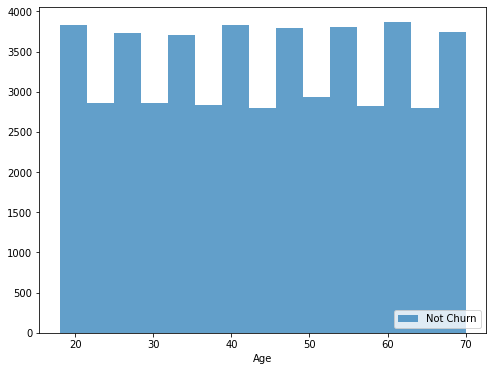

In [34]:
# distribution of the Age for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(not_churn["Age"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='lower right')
pyplot.show()

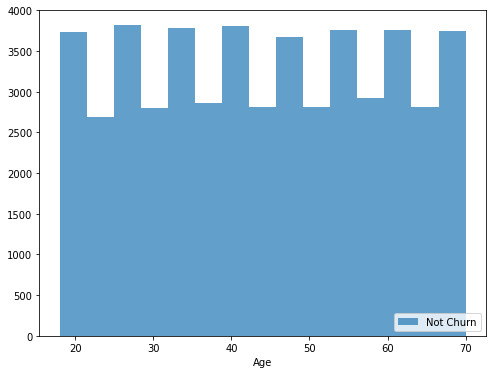

In [35]:
# Let's examine the Age of the churn group
churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

# distribution of the Age for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(churn["Age"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='lower right')
pyplot.show()

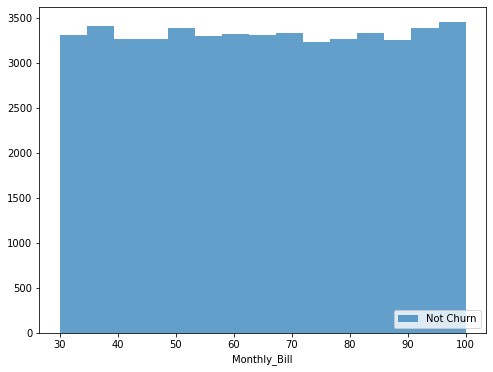

In [36]:
# Let's examine the Monthly_Bill of the churn group
churn["Monthly_Bill"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

# distribution of the Monthly_Bill for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Monthly_Bill')
pyplot.hist(churn["Monthly_Bill"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='lower right')
pyplot.show()

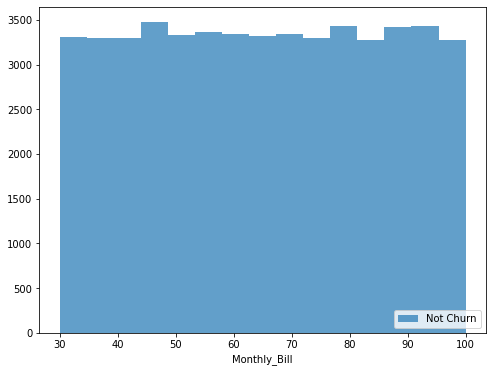

In [37]:
# Let's examine the Monthly_Bill of the not_churn group
not_churn["Monthly_Bill"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

# distribution of the Monthly_Bill for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Monthly_Bill')
pyplot.hist(not_churn["Monthly_Bill"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='lower right')
pyplot.show()

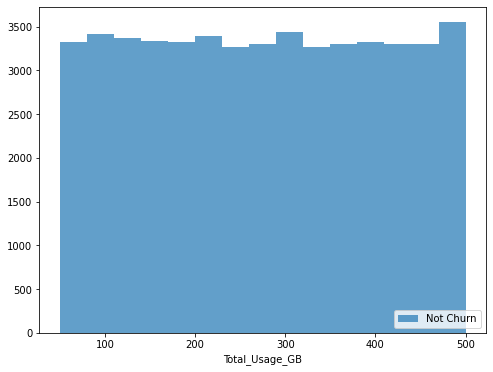

In [38]:
# Let's examine the Total_Usage_GB of the not_churn group
not_churn["Total_Usage_GB"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

# distribution of the Total_Usage_GB for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total_Usage_GB')
pyplot.hist(not_churn["Total_Usage_GB"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='lower right')
pyplot.show()

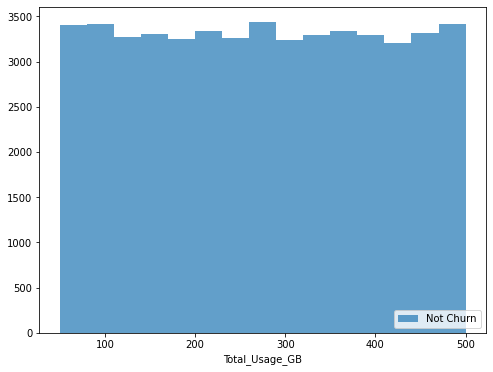

In [39]:
# Let's examine the Total_Usage_GB of the churn group
churn["Total_Usage_GB"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

# distribution of the Total_Usage_GB for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total_Usage_GB')
pyplot.hist(churn["Total_Usage_GB"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='lower right')
pyplot.show()

### 1) "The target column exhibits a balanced distribution."

### 2) "The dataset shows a relatively even distribution between male and female individuals."

# Data Balancing

In [40]:
(data['Churn'].value_counts()/len(data['Churn']))*100

0.0    50.221
1.0    49.779
Name: Churn, dtype: float64

#### there is no need to balance the data 

# label encoding

In [41]:
LE= LabelEncoder()
data['Location']=LE.fit_transform(data['Location'])


In [42]:
data.replace({'Male':0,'Female':1},inplace=True)

In [43]:
# data backup

data_backup = data.copy(deep=True)

# split the data into x and y 

In [44]:
# input variables

X = data.drop(['Name','Churn'],axis=1)

In [45]:
# output variable

y= data['Churn']

## standardization

In [46]:
sc=StandardScaler()
scaled=sc.fit_transform(X)
X=pd.DataFrame(scaled,columns=X.columns)

## spliting the data into train and test

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 0)

In [48]:
X_train.shape

(75000, 6)

In [49]:
X_test.shape

(25000, 6)

# MODEL BUILDING

### logistic regression

In [50]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [51]:
print("Train Accuracy",accuracy_score(y_train, y_train_pred)*100)
print("Test Accuracy",accuracy_score(y_test, y_test_pred)*100)

Train Accuracy 50.342666666666666
Test Accuracy 49.992


In [52]:
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

confusion_matrix:- 
 [[7734 4868]
 [7634 4764]] 

classification_report:- 
               precision    recall  f1-score   support

         0.0       0.50      0.61      0.55     12602
         1.0       0.49      0.38      0.43     12398

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.49     25000
weighted avg       0.50      0.50      0.49     25000



#### The Logistic Regression model accuracy is 49.99% on the test set and 50.34% on the train set

### Decision Tree 

In [53]:
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)

In [54]:
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 49.46 

confusion_matrix:- 
 [[6285 6317]
 [6318 6080]] 

classification_report:- 
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     12602
         1.0       0.49      0.49      0.49     12398

    accuracy                           0.49     25000
   macro avg       0.49      0.49      0.49     25000
weighted avg       0.49      0.49      0.49     25000



#### The Decision Tree model accuracy is 49.99% on the test set and 100% on the train set 

### Random Forest

In [55]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 49.82 

confusion_matrix:- 
 [[6690 5912]
 [6633 5765]] 

classification_report:- 
               precision    recall  f1-score   support

         0.0       0.50      0.53      0.52     12602
         1.0       0.49      0.46      0.48     12398

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



#### The Random Forest model accuracy is 49.29% on the test set and 100% on the train set 

### SVC

In [56]:
SVC = SVC()
SVC.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 49.82 

confusion_matrix:- 
 [[6690 5912]
 [6633 5765]] 

classification_report:- 
               precision    recall  f1-score   support

         0.0       0.50      0.53      0.52     12602
         1.0       0.49      0.46      0.48     12398

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



#### The SVC model accuracy is 49.29% on the test set and 100% on the train set 

### KNN

In [57]:
KNC=KNeighborsClassifier()
KNC.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 49.82 

confusion_matrix:- 
 [[6690 5912]
 [6633 5765]] 

classification_report:- 
               precision    recall  f1-score   support

         0.0       0.50      0.53      0.52     12602
         1.0       0.49      0.46      0.48     12398

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



#### The KNN model accuracy is 49.29% on the test set and 100% on the train set 

## GradientBoostingClassifier

In [58]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 49.82 

confusion_matrix:- 
 [[6690 5912]
 [6633 5765]] 

classification_report:- 
               precision    recall  f1-score   support

         0.0       0.50      0.53      0.52     12602
         1.0       0.49      0.46      0.48     12398

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



#### The GradientBoostingClassifier model accuracy is 49.29% on the test set and 100% on the train set 

## we need to choose random forest for further process beacause it gives higher accuracy

# FEATURE SELECTION

In [59]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [60]:
print(selection.feature_importances_)

[0.22125015 0.01408388 0.02418343 0.17725679 0.28473969 0.27848604]


<AxesSubplot: >

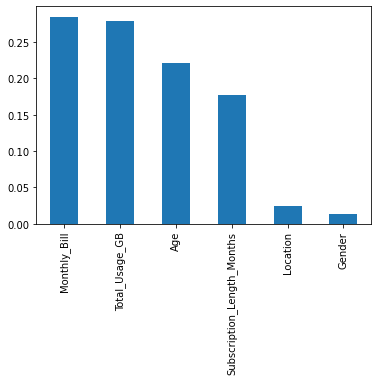

In [61]:
#  plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [62]:
X_imp = X[feat_importances.nlargest(4).index]
X_imp

,Monthly_Bill,Total_Usage_GB,Age,Subscription_Length_Months
0,0.410606,-0.294289,1.241670,0.651115
1,-0.805374,-0.784852,1.176226,-1.658879
2,1.009204,1.422681,-1.310651,-1.081380
3,1.625597,0.173279,-0.525321,-1.370129
4,-0.341720,-0.064338,0.129120,0.939864
...,...,...,...,...
99995,-0.490504,-0.370939,-0.721654,1.517363
99996,-0.168220,0.587191,1.176226,0.939864
99997,1.535140,-0.179313,1.307115,0.651115
99998,-0.781153,1.223390,0.456341,1.084239


In [63]:
# split the data

X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.25,random_state = 0)

In [64]:
# Random Forest
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 99.99866666666667 

Test Accuracy:- 49.74 

confusion_matrix:- 
 [[6561 6041]
 [6524 5874]] 

classification_report:- 
               precision    recall  f1-score   support

         0.0       0.50      0.52      0.51     12602
         1.0       0.49      0.47      0.48     12398

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



In [65]:
# hyperparameters

# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]

# Number of features to consider at every split
max_features = ["sqrt", "log2"]

# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]

# Min samples required to split the node
min_sample_split = [2,5,10,15,50]

# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [66]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

### RandomizedSearchCV

In [67]:
rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [70]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [71]:
rf_model.best_params_  # best parameter
RF = RandomForestClassifier(n_estimators=100,min_samples_split= 5,min_samples_leaf= 5,max_features='sqrt',max_depth= 29)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 93.88266666666667 

Test Accuracy:- 50.388 

confusion_matrix:- 
 [[6547 6055]
 [6348 6050]] 

classification_report:- 
               precision    recall  f1-score   support

         0.0       0.51      0.52      0.51     12602
         1.0       0.50      0.49      0.49     12398

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



## Now we got 93.88 accuracy

# CONCLUSION:  After implementing feature selection and optimizing hyperparameters, the Random Forest model demonstrated a notable improvement in accuracy. Now we got accuracy 93.88 %